# Task 2
- From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually. 

## Submitted by : Aman Preet Singh Gulati   

### Unsupervised machine learning is the machine learning task of inferring a function to describe hidden structure from “unlabeled” data (a classification or categorization is not included in the observations). Common scenarios for using unsupervised learning algorithms include:
- Data Exploration
- Outlier Detection
- Pattern Recognition

### K-Means

- The most common and simplest clustering algorithm out there is the K-Means clustering. This algorithms involve you telling the algorithms how many possible cluster (or K) there are in the dataset. The algorithm then iteratively moves the k-centers and selects the datapoints that are closest to that centroid in the cluster.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Elbow Method (finding number of optimum clusters)

<img src="Elbow method.png">

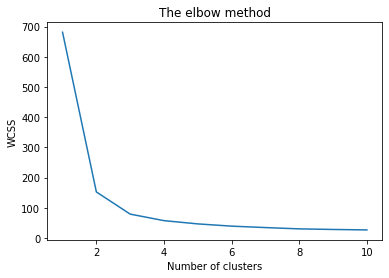

In [4]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### From this we choose the number of clusters as 3. 

## Predict the optimum number of clusters ?

## The optimum number of  clusters would be 3 according to the representation in elbow method

The best number for K is the “elbow” or kinked region. After this point, it is generally established that adding more clusters will not add significant value to your analysis. Below is an example script for K-Means using Scikit-Learn on the iris dataset:

## Visual Represenation

Text(0.5, 0.92, 'K Means')

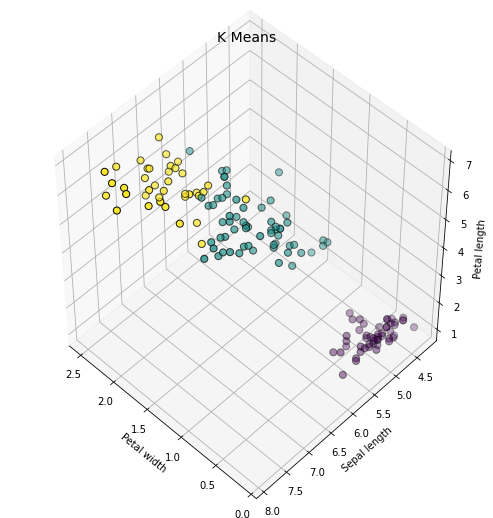

In [5]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

X = iris.data          #KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

One issue with K-means, as see in the 3D diagram above, is that it does hard labels. However, you can see that datapoints at the boundary of the purple and yellow clusters can be either one. For such circumstances, a different approach may be necessary.

### Mixture Models

In K-Means, we do what is called “hard labeling”, where we simply add the label of the maximum probability. However, certain data points that exist at the boundary of clusters may simply have similar probabilities of being on either clusters. In such circumstances, we look at all the probabilities instead of the max probability. This is known as “soft labeling”.

Text(0.5, 0.92, 'Gaussian Mixture Model')

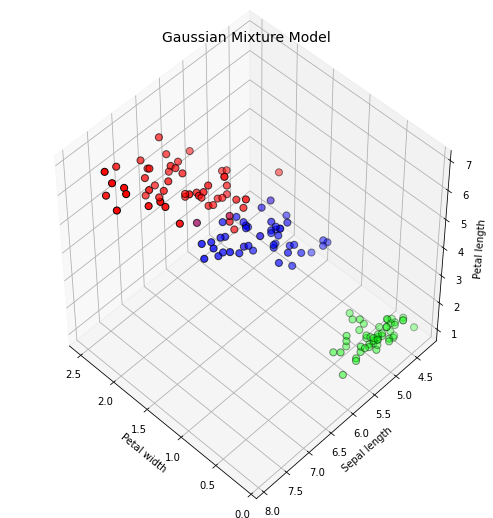

In [6]:
from sklearn.mixture import GaussianMixture

X = iris.data     #Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

For the above Gaussian Mixure Model, the colors of the datapoints are based on the Gaussian probability of being near the cluster. The RGB values are based on the nearness to each of the red, blue and green clusters. If you look at the datapoints near the boundary of the blue and red cluster, you shall see purple, indicating the datapoints are close to either clusters.